In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Load in the tidy numbers file from summary_data

In [2]:
all_runs = pd.read_csv("summary_data/tidy_numbers.csv")
# Jump through some hopes to reomve suspect data...
numerical=all_runs.iloc[:,2:]
numerical.mask(abs(numerical) > 1e8, np.nan,inplace=True)
#numerical.mask(abs(numerical) < 1e-6, np.nan,inplace=True)
all_runs.iloc[:,2:]=numerical
all_runs[10:20]

,model,experiment,years,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,...,SASmonsoon area stddev,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio)
10,AWI-ESM-1-1-LR,midHolocene-cal-adj,99,12.6325,-1.193310e+00,0.472018,0.627697,2.580770e+01,0.228479,2.35301,...,230113.0,0.462125,2.933230e+00,9.322120e-01,3.741340e+00,0.233192,0.354589,0.323584,0.190119,0.230543
11,AWI-ESM-1-1-LR,midHolocene,99,12.5705,-1.175770e+00,0.477450,0.628213,2.581040e+01,0.229441,2.34198,...,232204.0,0.422383,3.123780e+00,9.697630e-01,3.878320e+00,0.277284,0.387331,0.317995,0.181467,0.214806
12,AWI-ESM-1-1-LR,piControl,99,13.0093,-1.329180e+00,0.465755,0.666452,2.614970e+01,0.243864,2.59649,...,279652.0,0.381385,2.942160e+00,1.050480e+00,3.275200e+00,0.286341,0.471988,0.227909,0.258472,0.156900
13,BCC-CSM1-1,1pctCO2,139,17.4011,6.828450e-10,0.388156,0.549009,-1.694590e-10,0.144344,2.19552,...,154683.0,1.014400,-3.233340e-09,9.012800e-11,-1.802560e-09,0.292631,0.425014,0.381862,-0.252429,-0.718274
14,BCC-CSM1-1,abrupt4xCO2,149,18.6027,-4.819340e-10,0.343235,0.628354,-3.354760e-10,0.175274,2.06775,...,170726.0,1.272380,9.939110e-09,-9.313230e-10,-5.167340e-09,0.409351,0.720094,0.230381,-0.059692,-0.591170
15,BCC-CSM1-1,historical,162,14.0683,1.202100e-02,0.399792,0.784935,2.761640e+01,0.355725,2.45728,...,199221.0,0.992981,2.612520e+00,9.198110e-01,2.392870e+00,0.285233,0.444738,0.260478,-0.055728,-0.484654
16,BCC-CSM1-1,midHolocene-cal-adj,99,13.6284,6.130780e-02,0.344098,0.663096,2.694470e+01,0.168144,2.46683,...,230707.0,0.834797,2.773910e+00,7.174120e-01,2.631600e+00,0.188253,0.443884,0.226125,-0.132852,-0.625129
17,BCC-CSM1-1,midHolocene,99,13.5752,4.361290e-02,0.341738,0.661514,2.694990e+01,0.169145,2.43478,...,203255.0,0.782115,2.974020e+00,7.614540e-01,2.780070e+00,0.228783,0.454012,0.222175,-0.130681,-0.620347
18,BCC-CSM1-1,piControl,499,13.7105,-3.419910e-02,0.419824,0.695788,2.734800e+01,0.169339,2.40606,...,200218.0,1.004380,2.576810e+00,8.809750e-01,2.299740e+00,0.260861,0.478925,0.261998,-0.157789,-0.701657
19,C20-Reanalysis,C20-Reanalysis,141,15.0072,-5.197260e-01,0.294772,0.743628,2.772870e+01,0.305214,1.67542,...,268938.0,0.986674,3.324040e+00,1.844450e+00,2.972460e+00,0.428745,0.482703,0.321370,0.182166,NaN


Select the lgm runs (we'll take the calednar adjusted ones).

Then duplicate this and populate with the piControl equivalent numbers

In [3]:
lgm=all_runs.loc[all_runs['experiment'] == 'lgm-cal-adj']
lgm.set_index('model', inplace = True)
all_pis=all_runs.loc[all_runs['experiment'] == 'piControl']
all_pis.set_index('model', inplace = True)
lgm_pis=all_pis[all_pis.index.isin(lgm.index)]
# drop the experiment and years columns
lgm_pis.drop(['experiment','years'],axis=1, inplace=True)
lgm.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
lgm_diff=lgm-lgm_pis
lgm_diff['experiment']='lgm'
lgm_diff['run']=list(range(0,np.size(lgm.index)))
lgm_diff.reset_index(inplace=True)
lgm_diff.set_index('run',inplace=True)
lgm_diff

,model,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,EEIO mean,EEIO stddev,...,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio),experiment
run,,,,,,,,,,,,,,,,,,,,,
0,AWI-ESM-1-1-LR,-3.71394,0.551941,0.002963,0.146279,-1.7591,0.018858,-0.51273,-1.4864,0.028512,...,-0.027591,-0.69212,0.027800,-1.06440,-0.017677,-0.113179,-0.076737,0.024378,0.025874,lgm
1,CCSM4,-4.91608,0.647713,-0.023387,-0.177133,-2.2719,-0.023118,0.12149,-1.8621,-0.034798,...,-0.222557,-0.73329,0.023510,-0.88016,-0.034406,-0.044062,-0.152206,0.078740,-0.041236,lgm
2,CNRM-CM5,-2.63480,0.648283,-0.043482,0.020978,-1.3183,0.000774,0.38769,-1.1661,-0.025917,...,-0.061401,-0.12310,-0.094960,-0.25480,-0.012153,-0.018792,-0.000186,0.021799,-0.083667,lgm
3,COSMOS-ASO,-5.47037,0.143140,-0.022787,0.003940,-3.3779,0.168576,0.65740,NaN,NaN,...,-0.016516,-0.26899,0.289086,-0.47727,0.092548,0.040416,-0.020297,-0.176943,NaN,lgm
4,FGOALS-g2,-4.58484,0.852853,-0.112132,-0.348958,-3.0678,-0.053093,0.71457,-3.1809,-0.058592,...,-0.664636,-0.32790,-0.120490,-0.47530,-0.036813,-0.088272,-0.176191,-0.115578,-0.020579,lgm
5,GISS-E2-R,-4.80725,0.898448,-0.013454,-0.162594,-2.3011,-0.029133,-0.05564,-2.0151,-0.058095,...,-0.184239,-0.70671,-0.438600,-0.65786,-0.054538,-0.045812,-0.188789,-0.024309,-0.089625,lgm
6,INM-CM4-8,-3.72303,0.198667,0.012234,0.076214,-1.8552,0.029414,0.04791,-1.4682,0.008280,...,-0.009709,-1.60721,-0.686790,-2.35016,-0.096780,-0.223320,0.090847,0.434960,0.414367,lgm
7,IPSL-CM5A-LR,-4.59955,0.387069,0.055710,0.222348,-3.0342,0.068717,1.19536,-2.9640,0.107243,...,0.093832,-0.65531,-0.140968,-1.24195,-0.056897,-0.136972,0.036152,0.066473,-0.032905,lgm
8,MIROC-ES2L,-4.04850,0.203450,-0.010390,-0.156850,-2.1518,-0.040917,0.33385,-2.0723,-0.037159,...,0.000629,-1.13422,-0.928580,-1.03883,-0.049006,-0.039629,0.004853,0.136239,0.099239,lgm


In [4]:
lig127k=all_runs.loc[all_runs['experiment'] == 'lig127k-cal-adj']
lig127k.set_index('model', inplace = True)
lig127k_pis=all_pis[all_pis.index.isin(lig127k.index)]
# drop the experiment and years columns
lig127k_pis.drop(columns=['experiment','years'],inplace=True)
lig127k.drop(columns=['experiment','years'],inplace=True)
# Create a difference grid
lig127k_diff=lig127k-lig127k_pis
lig127k_diff['experiment']='lig127k'
lig127k_diff['run']=list(range(50,50+np.size(lig127k.index)))
lig127k_diff.reset_index(inplace=True)
lig127k_diff.set_index('run',inplace=True)

In [5]:
midHolocene=all_runs.loc[all_runs['experiment'] == 'midHolocene-cal-adj']
midHolocene.set_index('model', inplace = True)
midHolocene_pis=all_pis[all_pis.index.isin(midHolocene.index)]
# drop the experiment and years columns
midHolocene_pis.drop(['experiment','years'],axis=1, inplace=True)
midHolocene.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
midHolocene_diff=midHolocene-midHolocene_pis
midHolocene_diff['experiment']='midHolocene'
midHolocene_diff['run']=list(range(100,100+np.size(midHolocene.index)))
midHolocene_diff.reset_index(inplace=True)
midHolocene_diff.set_index('run',inplace=True)

In [6]:
abrupt4xCO2=all_runs.loc[all_runs['experiment'] == 'abrupt4xCO2']
abrupt4xCO2.set_index('model', inplace = True)
abrupt4xCO2_pis=all_pis[all_pis.index.isin(abrupt4xCO2.index)]
# drop the experiment and years columns
abrupt4xCO2_pis.drop(['experiment','years'],axis=1, inplace=True)
abrupt4xCO2.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
abrupt4xCO2_diff=abrupt4xCO2-abrupt4xCO2_pis
# add back in the experiment name
abrupt4xCO2_diff['experiment']='abrupt4xCO2'
abrupt4xCO2_diff['run']=list(range(150,150+np.size(abrupt4xCO2.index)))
abrupt4xCO2_diff.reset_index(inplace=True)
abrupt4xCO2_diff.set_index('run',inplace=True)

In [7]:
abrupt4xCO2_diff

,model,GMTemp,DMI mean,DMI stddev,Nino34 stddev,TIO mean,IOBM,DMI AnnCycAmp,EEIO mean,EEIO stddev,...,SASmonsoon rain stddev,SAS rain ann,SAS rain jja,SAS rain djf,SAS rain jja stddev,SAS rain djf stddev,r(nino34.iod),r(iod.iobm),r(iod.eeio),experiment
run,,,,,,,,,,,,,,,,,,,,,
150,BCC-CSM1-1,4.8922,0.034199,-0.076589,-0.067434,-27.3480,0.005935,-0.338310,-27.9149,-0.025030,...,0.268000,-2.57681,-0.880975,-2.29974,0.148490,0.241169,-0.031617,0.098097,0.110487,abrupt4xCO2
151,CCSM4,4.8655,-0.025755,-0.001514,-0.103962,-27.7462,-0.024781,-0.309460,-28.6391,0.051633,...,0.195358,-3.69462,-1.595130,-3.92245,0.025473,0.180918,0.050090,-0.093356,-0.038724,abrupt4xCO2
152,CESM2,7.2204,0.009576,-0.373701,-0.470807,-28.3466,-0.045929,0.954510,-29.6222,-0.077728,...,0.176951,-3.13267,-1.348860,-3.06565,0.129023,0.185891,-0.412194,-0.327714,-0.078907,abrupt4xCO2
153,CNRM-CM5,5.1965,0.137365,0.051317,0.097066,-26.9995,0.062736,-0.365700,-27.6995,0.071170,...,-0.029788,-2.94003,-1.686820,-2.98106,0.032002,0.087965,0.253001,-0.108438,-0.201768,abrupt4xCO2
154,CNRM-CM6-1,6.7382,0.061041,-0.146940,0.135754,-27.2232,0.037859,0.165040,-27.8691,-0.051785,...,0.014099,-3.24790,-1.339760,-3.02439,-0.001287,0.006911,-0.043812,-0.166363,0.100520,abrupt4xCO2
155,CSIRO-Mk3-6-0,5.7115,1.192850,-0.128136,0.278314,-26.9827,0.019321,1.838890,-28.6558,0.174644,...,0.471879,-1.80774,-0.717625,-2.06278,0.017462,0.105023,-0.509658,-0.274693,-0.834715,abrupt4xCO2
156,FGOALS-f3-L,5.1749,-0.104471,-0.183091,-0.038630,-27.1844,-0.015903,0.387240,-28.1075,0.095950,...,0.002136,-2.98264,-0.928788,-2.89196,0.024095,0.092252,0.005273,-0.302875,-0.187204,abrupt4xCO2
157,FGOALS-g2,5.6582,-0.453137,-0.103538,-0.203131,-27.1461,-0.076213,-0.118780,-27.8713,-0.116982,...,-0.303840,-2.39227,-1.159790,-2.32072,0.014331,0.079755,-0.098518,-0.103813,-0.042167,abrupt4xCO2
158,FGOALS-s2,5.9333,0.212274,-0.271426,0.280830,-26.9706,0.024843,0.515090,-28.1611,0.045780,...,0.396431,-2.64895,-0.938356,-2.91510,-0.050049,0.238975,0.075435,-0.279098,-0.207487,abrupt4xCO2


In [8]:
all_diffs=pd.concat([lgm_diff,midHolocene_diff,lig127k_diff,abrupt4xCO2_diff])

In [9]:
# Add some colors to allow for convenient plotting...
all_diffs['color'] = all_diffs['experiment']
all_diffs['color'] = all_diffs['color'].map({'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'},
                             na_action=None)

<Figure size 432x288 with 0 Axes>

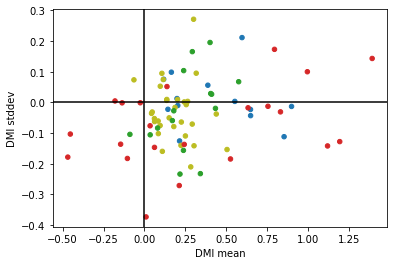

In [10]:
fig = plt.figure()
dmi_w_mean=all_diffs.plot.scatter(x='DMI mean',y='DMI stddev',c='color')
dmi_w_mean.axhline(0,color='black')
dmi_w_mean.axvline(0,color='black')
fig.savefig('plots/dmi_w_mean.pdf')

<Figure size 432x288 with 0 Axes>

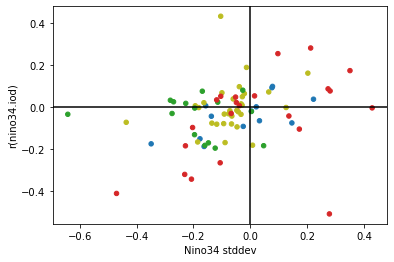

In [11]:
fig = plt.figure()
enso_role=all_diffs.plot.scatter(x='Nino34 stddev',y='r(nino34.iod)',c='color')
enso_role.axhline(0,color='black')
enso_role.axvline(0,color='black')
fig.savefig('plots/enso_role.pdf')

<Figure size 432x288 with 0 Axes>

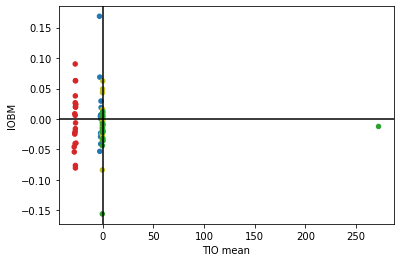

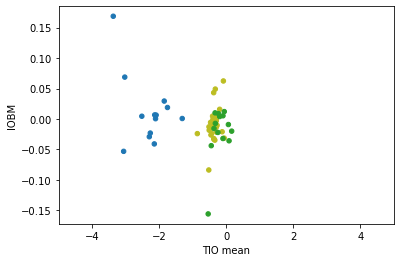

In [12]:
fig = plt.figure()
iobm_w_mean=all_diffs.plot.scatter(x='TIO mean',y='IOBM',c='color')
iobm_w_mean.axhline(0,color='black')
iobm_w_mean.axvline(0,color='black')
fig.savefig('plots/iobm_w_mean.pdf')
iobm_w_mean=all_diffs.plot.scatter(x='TIO mean',y='IOBM',c='color',xlim=[-5,5])

<Figure size 432x288 with 0 Axes>

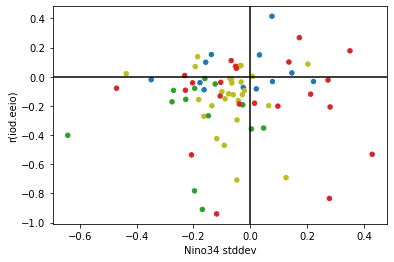

In [13]:
fig = plt.figure()
eeio_enso=all_diffs.plot.scatter(x='Nino34 stddev',y='r(iod.eeio)',c='color')
eeio_enso.axhline(0,color='black')
eeio_enso.axvline(0,color='black')
fig.savefig('plots/eeio_enso.pdf')

<Figure size 432x288 with 0 Axes>

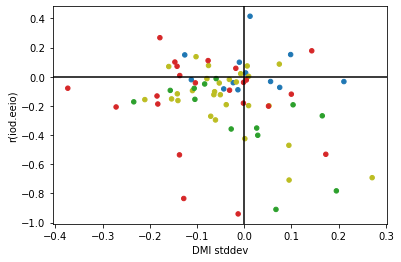

In [14]:
fig = plt.figure()
eeio_iod=all_diffs.plot.scatter(x='DMI stddev',y='r(iod.eeio)',c='color')
eeio_iod.axhline(0,color='black')
eeio_iod.axvline(0,color='black')
fig.savefig('plots/eeio_iod.pdf')